In [2]:
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
import matplotlib
import math

%matplotlib inline

In [3]:
qasm_sim = q.Aer.get_backend('qasm_simulator')
statevec_sim = q.Aer.get_backend("statevector_simulator")

In [5]:
obw = q.QuantumCircuit(2, 2)
obw.ry(math.pi/4, 0)
obw.ry(math.pi/4, 1)
orig_statevec = q.execute(obw, backend=statevec_sim).result().get_statevector()
obw.measure([0, 1], [0, 1])
obw.draw()

┌──────────┐┌─┐   
q_0: ┤ RY(pi/4) ├┤M├───
     ├──────────┤└╥┘┌─┐
q_1: ┤ RY(pi/4) ├─╫─┤M├
     └──────────┘ ║ └╥┘
c_0: ═════════════╩══╬═
                     ║ 
c_1: ════════════════╩═

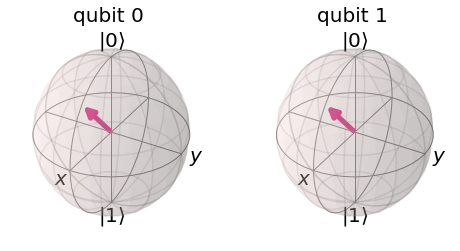

In [6]:
plot_bloch_multivector(orig_statevec)

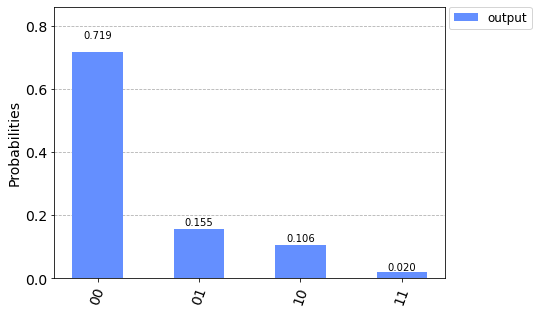

In [7]:
orig_counts = q.execute(obw, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=['output'])

In [9]:
obw = q.QuantumCircuit(2, 2)
obw.h(0)
obw.h(1)
obw.ry(math.pi/4, 0)
obw.ry(math.pi/4, 1)
statevec = q.execute(obw, backend=statevec_sim).result().get_statevector()
obw.measure([0, 1], [0, 1])
obw.draw()

┌───┐┌──────────┐┌─┐   
q_0: ┤ H ├┤ RY(pi/4) ├┤M├───
     ├───┤├──────────┤└╥┘┌─┐
q_1: ┤ H ├┤ RY(pi/4) ├─╫─┤M├
     └───┘└──────────┘ ║ └╥┘
c_0: ══════════════════╩══╬═
                          ║ 
c_1: ═════════════════════╩═

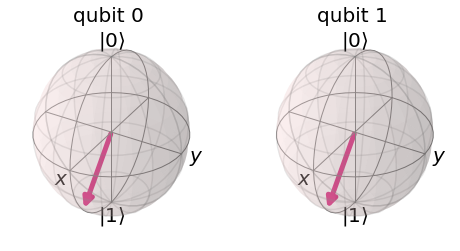

In [10]:
plot_bloch_multivector(statevec)

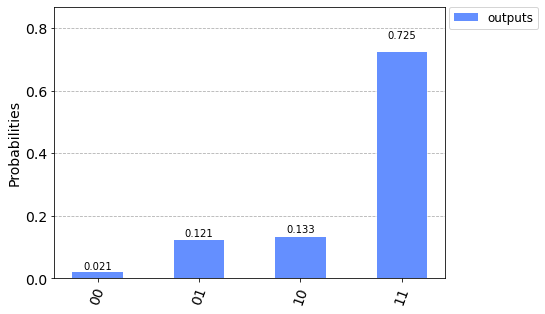

In [11]:
counts = q.execute(obw, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['outputs'])

## Hadamard Sandwich

In [12]:
obw = q.QuantumCircuit(2, 2)
obw.h(0)
obw.h(1)
obw.ry(math.pi/4, 0)
obw.ry(math.pi/4, 1)
obw.h(0)
obw.h(1)
statevec = q.execute(obw, backend=statevec_sim).result().get_statevector()
obw.measure([0, 1], [0, 1])
obw.draw()

┌───┐┌──────────┐┌───┐┌─┐   
q_0: ┤ H ├┤ RY(pi/4) ├┤ H ├┤M├───
     ├───┤├──────────┤├───┤└╥┘┌─┐
q_1: ┤ H ├┤ RY(pi/4) ├┤ H ├─╫─┤M├
     └───┘└──────────┘└───┘ ║ └╥┘
c_0: ═══════════════════════╩══╬═
                               ║ 
c_1: ══════════════════════════╩═

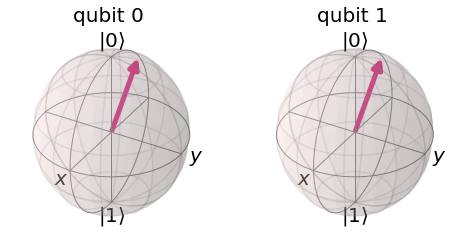

In [13]:
plot_bloch_multivector(statevec)

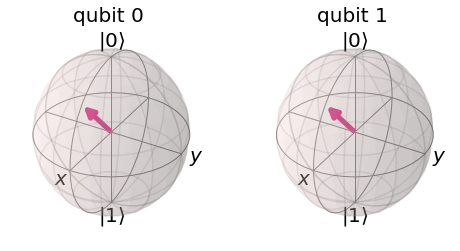

In [14]:
plot_bloch_multivector(orig_statevec)

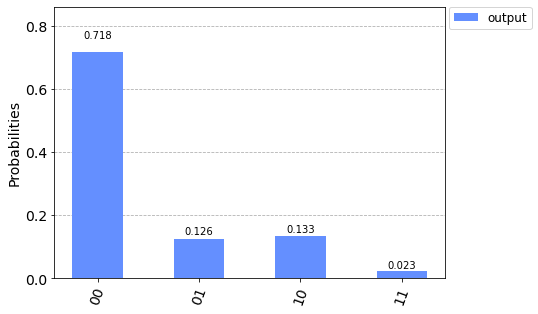

In [17]:
zlicz = q.execute(obw, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([zlicz], legend=['output'])

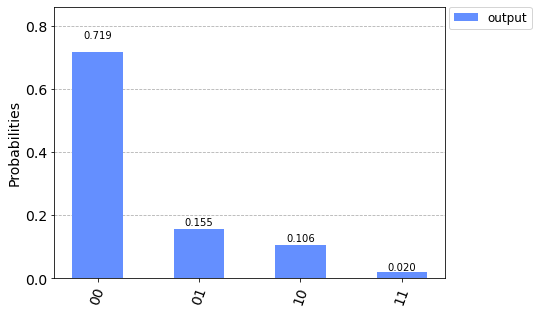

In [18]:
plot_histogram([orig_counts], legend=['output'])

## Orginalny obwód z poszczególnymi qubitami

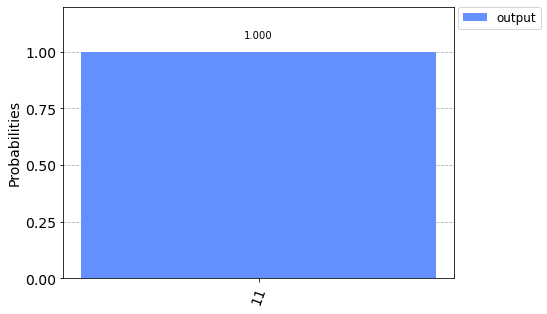

In [20]:
obw = q.QuantumCircuit(2, 2)
obw.x(0)
obw.x(1)
orig_statevec = q.execute(obw, backend=statevec_sim).result().get_statevector()
obw.measure([0, 1], [0, 1])
orig_counts = q.execute(obw, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=['output'])

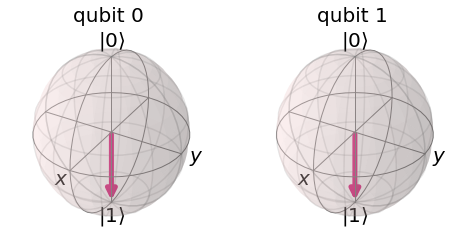

In [21]:
plot_bloch_multivector(orig_statevec)

## Hadamard na przeciwko poszczególnych quibitów

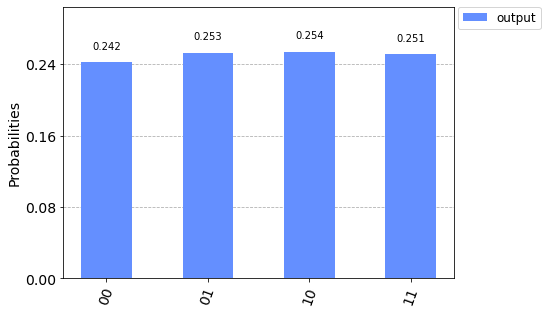

In [23]:
obw = q.QuantumCircuit(2, 2)
obw.h(0)
obw.h(1)
obw.x(0)
obw.x(1)
statevec = q.execute(obw, backend=statevec_sim).result().get_statevector()
obw.measure([0, 1], [0, 1])
zlicz = q.execute(obw, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([zlicz], legend=['output'])

## Hadamard Sandwich poszczególnych qubitów

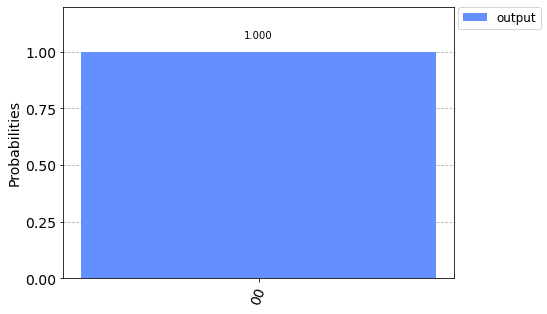

In [25]:
obw = q.QuantumCircuit(2, 2)
obw.h(0)
obw.h(1)
obw.x(0)
obw.x(1)
obw.h(0)
obw.h(1)
statevec = q.execute(obw, backend=statevec_sim).result().get_statevector()
obw.measure([0, 1], [0, 1])
zlicz = q.execute(obw, backend=qasm_sim).result().get_counts()
plot_histogram([zlicz], legend=['output'])

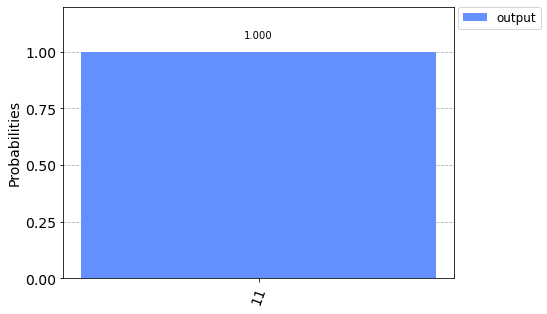

In [27]:
plot_histogram([orig_counts], legend=['output'])

In [28]:
def balanced_black_box(obw):
    obw.cx(0, 2)
    obw.cx(1, 2)
    return obw

def constant_black_box(obw):
    return obw

In [29]:
obw = q.QuantumCircuit(3, 2)
obw = balanced_black_box(obw)
obw.draw()

q_0: ──■───────
       │       
q_1: ──┼────■──
     ┌─┴─┐┌─┴─┐
q_2: ┤ X ├┤ X ├
     └───┘└───┘
c_0: ══════════
               
c_1: ══════════

## Hadamard Sandwich

In [31]:
obw = q.QuantumCircuit(3, 2)
obw.h(0)
obw.h(1)
obw.h(2)
obw = balanced_black_box(obw)
obw.h(0)
obw.h(1)
obw.draw()

┌───┐     ┌───┐     
q_0: ┤ H ├──■──┤ H ├─────
     ├───┤  │  └───┘┌───┐
q_1: ┤ H ├──┼────■──┤ H ├
     ├───┤┌─┴─┐┌─┴─┐└───┘
q_2: ┤ H ├┤ X ├┤ X ├─────
     └───┘└───┘└───┘     
c_0: ════════════════════
                         
c_1: ════════════════════

In [32]:
obw = q.QuantumCircuit(3, 2)
obw.h(0)
obw.h(1)
obw.h(2)
obw.barrier()
obw = balanced_black_box(obw)
obw.h(0)
obw.h(1)
obw.draw()

┌───┐ ░      ┌───┐     
q_0: ┤ H ├─░───■──┤ H ├─────
     ├───┤ ░   │  └───┘┌───┐
q_1: ┤ H ├─░───┼────■──┤ H ├
     ├───┤ ░ ┌─┴─┐┌─┴─┐└───┘
q_2: ┤ H ├─░─┤ X ├┤ X ├─────
     └───┘ ░ └───┘└───┘     
c_0: ═══════════════════════
                            
c_1: ═══════════════════════

## Hadamard

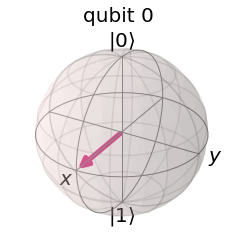

In [33]:
obw = q.QuantumCircuit(1, 1)
obw.h(0)
statevec = q.execute(obw, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)

## NOT i Hadamard

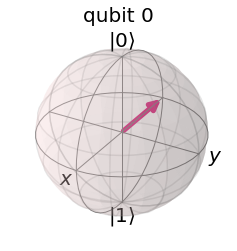

In [35]:
obw = q.QuantumCircuit(1, 1)
obw.x(0)
obw.h(0)
statevec = q.execute(obw, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)

In [36]:
obw = q.QuantumCircuit(3, 2)
obw.x(2)
obw.barrier()
obw.h(0)
obw.h(1)
obw.h(2)
obw.barrier()
obw = balanced_black_box(obw)
obw.barrier()
obw.h(0)
obw.h(1)
obw.draw()

░ ┌───┐ ░            ░ ┌───┐
q_0: ──────░─┤ H ├─░───■────────░─┤ H ├
           ░ ├───┤ ░   │        ░ ├───┤
q_1: ──────░─┤ H ├─░───┼────■───░─┤ H ├
     ┌───┐ ░ ├───┤ ░ ┌─┴─┐┌─┴─┐ ░ └───┘
q_2: ┤ X ├─░─┤ H ├─░─┤ X ├┤ X ├─░──────
     └───┘ ░ └───┘ ░ └───┘└───┘ ░      
c_0: ══════════════════════════════════
                                       
c_1: ══════════════════════════════════

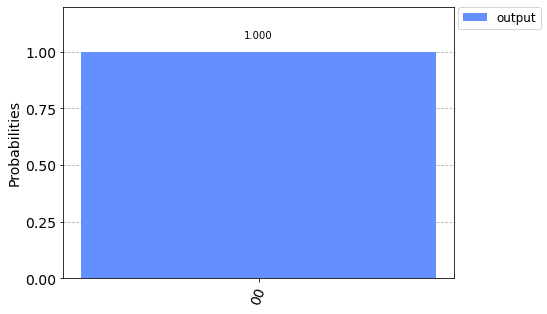

In [37]:
zlicz = q.execute(obw, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([zlicz], legend=['output'])

In [38]:
obw = q.QuantumCircuit(3, 2)
obw.x(2)
obw.barrier()
obw.h(0)
obw.h(1)
obw.h(2)
obw.barrier()
obw = constant_black_box(obw)
obw.barrier()
obw.h(0)
obw.h(1)
obw.measure([0, 1], [0, 1])
obw.draw()

░ ┌───┐ ░  ░ ┌───┐┌─┐   
q_0: ──────░─┤ H ├─░──░─┤ H ├┤M├───
           ░ ├───┤ ░  ░ ├───┤└╥┘┌─┐
q_1: ──────░─┤ H ├─░──░─┤ H ├─╫─┤M├
     ┌───┐ ░ ├───┤ ░  ░ └───┘ ║ └╥┘
q_2: ┤ X ├─░─┤ H ├─░──░───────╫──╫─
     └───┘ ░ └───┘ ░  ░       ║  ║ 
c_0: ═════════════════════════╩══╬═
                                 ║ 
c_1: ════════════════════════════╩═

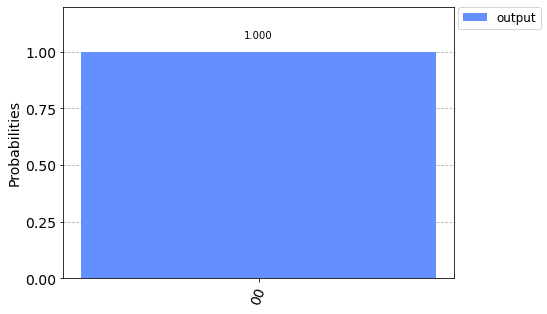

In [39]:
zlicz = q.execute(obw, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([zlicz], legend=['output'])

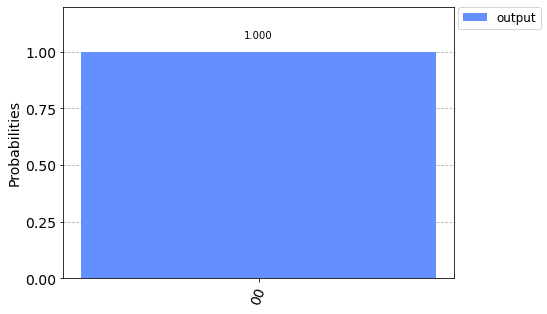

In [43]:
obw = q.QuantumCircuit(3, 2)
obw.barrier()
obw.ry(math.pi, 2)
obw.h(0)
obw.h(1)
obw.h(2)
obw.barrier()
obw = constant_black_box(obw)
obw.barrier()
obw.h(0)
obw.h(1)
obw.measure([0, 1], [0, 1])

zlicz = q.execute(obw, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([zlicz], legend=['output'])

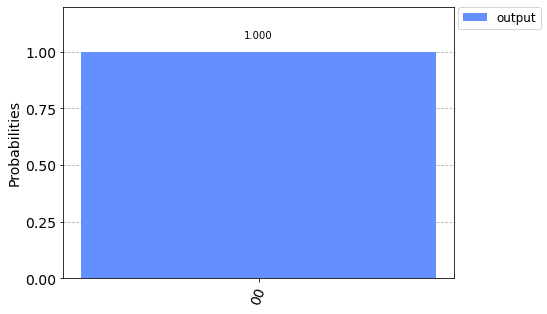

In [44]:
obw = q.QuantumCircuit(3, 2)
obw.ry(math.pi, 2)
obw.barrier()
obw.h(0)
obw.h(1)
obw.h(2)
obw.barrier()
obw = constant_black_box(obw)
obw.barrier()
obw.h(0)
obw.h(1)
obw.measure([0, 1], [0, 1])

zlicz = q.execute(obw, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([zlicz], legend=['output'])

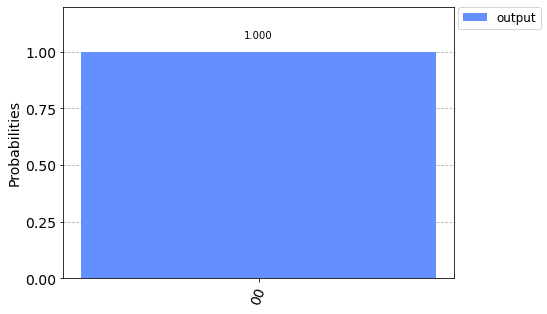

In [45]:
obw = q.QuantumCircuit(3, 2)
obw.barrier()
obw.h(0)
obw.h(1)
obw.h(2)
obw.x(2)
obw.barrier()
obw = constant_black_box(obw)
obw.barrier()
obw.h(0)
obw.h(1)
obw.measure([0, 1], [0, 1])

zlicz = q.execute(obw, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([zlicz], legend=['output'])

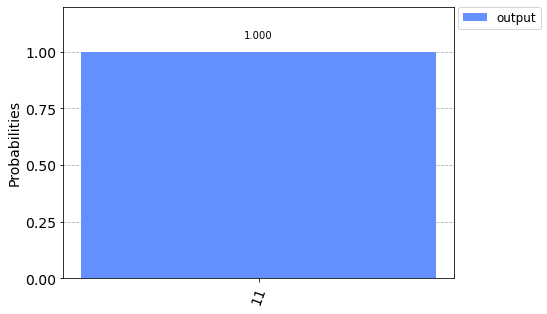

In [50]:
obw = q.QuantumCircuit(3, 2)
obw.barrier()
obw.h(0)
obw.h(1)
obw.h(2)
obw.ry(math.pi, 2)
obw.barrier()
obw = balanced_black_box(obw)
obw.barrier()
obw.h(0)
obw.h(1)
obw.measure([0, 1], [0, 1])

zlicz = q.execute(obw, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([zlicz], legend=['output'])

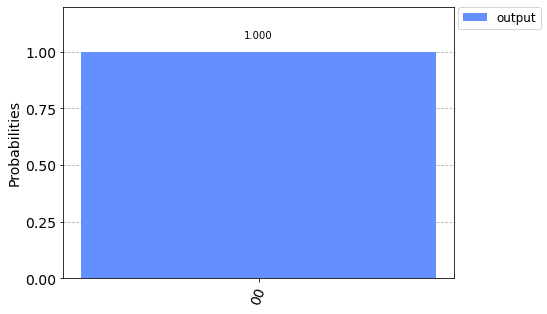

In [51]:
obw = q.QuantumCircuit(3, 2)
obw.barrier()
obw.h(0)
obw.h(1)
obw.h(2)
obw.ry(math.pi, 2)
obw.barrier()
obw = constant_black_box(obw)
obw.barrier()
obw.h(0)
obw.h(1)
obw.measure([0, 1], [0, 1])

zlicz = q.execute(obw, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([zlicz], legend=['output'])

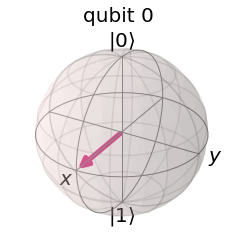

In [92]:
obw = q.QuantumCircuit(1, 1)
obw.ry(math.pi/2, 0)
statevec = q.execute(obw, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)
